# Download ArchRProject "scatac_HSC_kitsubset" from zenodo and run notebook in R environment (R-env)

In [2]:
library(ArchR)
library(rhdf5)
library(biomaRt)
library(dittoSeq)
library(dplyr)
library(Seurat)
library(RColorBrewer)
library(stringr)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggplot2)
library(gplots)
library(ComplexHeatmap)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [3]:
out_dir <- "./"
archr_out_kitsubset <- "./scatac_HSC_kitsubset"

In [5]:
scatac.object.subset <- loadArchRProject(archr_out_kitsubset)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

## Figure S7D

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1130b22f9abee-Date-2025-06-01_Time-11-58-23.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1130b22f9abee-Date-2025-06-01_Time-11-58-23.log



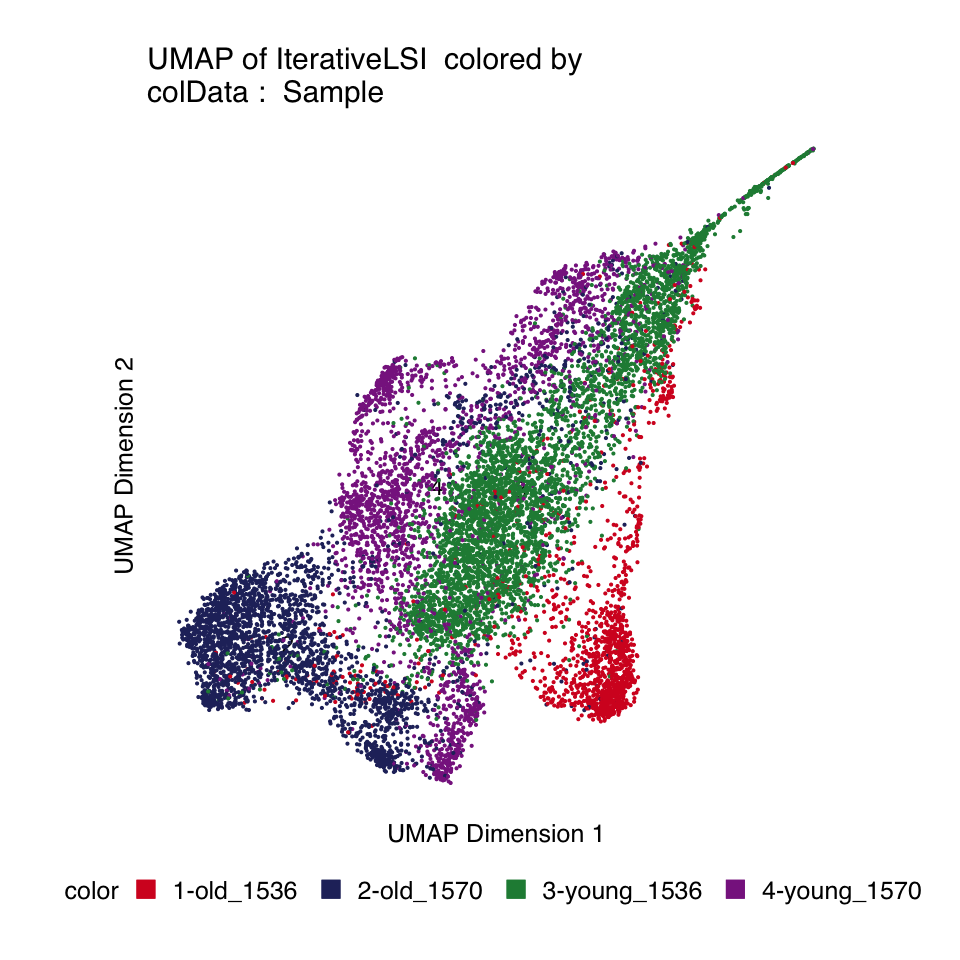

In [19]:
patac_new <- plotEmbedding(ArchRProj = scatac.object.subset, colorBy = "cellColData", name = "Sample", embedding = "UMAP",baseSize = 15, labelSize=5,legendSize=5) 

p<- patac_new + theme(panel.border = element_blank(),legend.text = element_text(size=15))+ geom_point(size = 0.5)

options(repr.plot.width = 8, repr.plot.height = 8)
#ggsave(paste0(outbase, 'ArchR_IterativeLSI.pdf'), p, dpi = 300)
p

## Figures 3A-3C

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1130b3e44c430-Date-2025-06-01_Time-11-57-55.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1130b3e44c430-Date-2025-06-01_Time-11-57-55.log

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


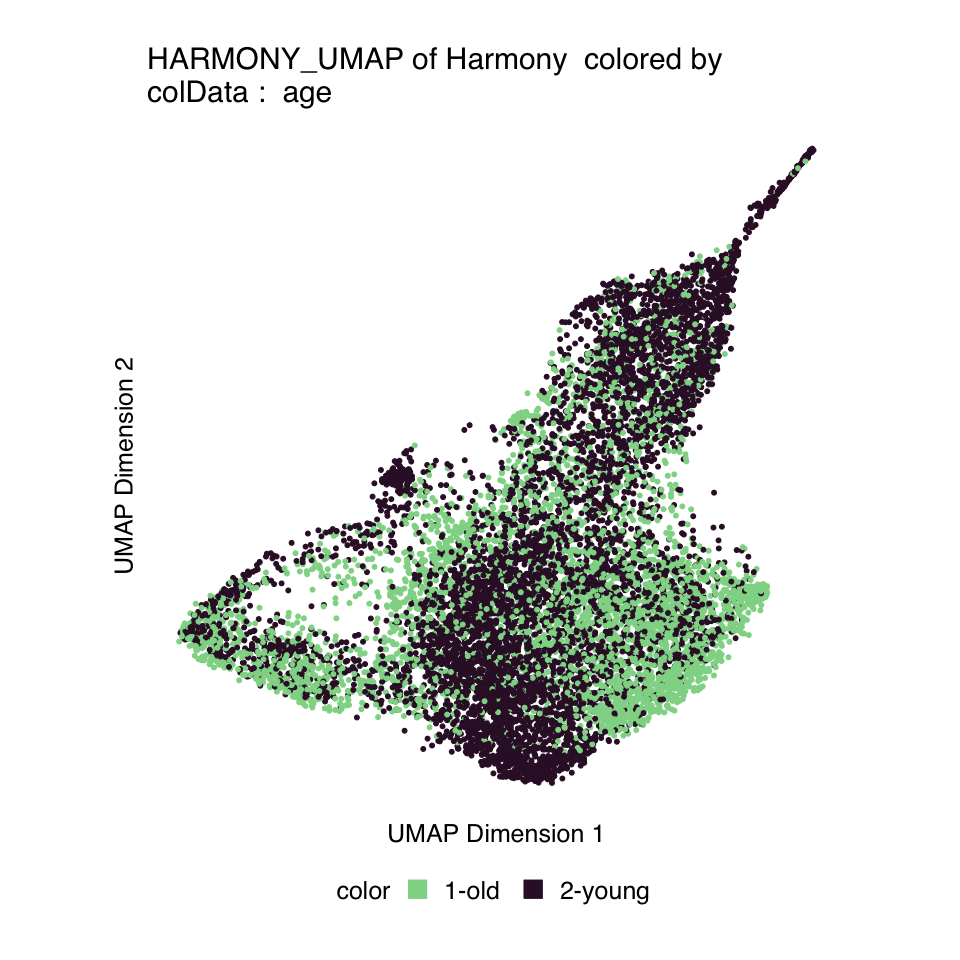

In [17]:
Harmony_age <- plotEmbedding(ArchRProj = scatac.object.subset, colorBy = "cellColData", name = "age", embedding = "HARMONY_UMAP",baseSize = 15, labelSize=5,legendSize=5)

p<- Harmony_age + theme(panel.border = element_blank(),legend.text = element_text(size=15)) + geom_point(size = 1, stroke = 0.5) + scale_color_manual(values = c('#8FD694','#351431'))
options(repr.plot.width = 8, repr.plot.height = 8)
#ggsave(paste0(outbase, 'ArchR_age.pdf'), p, dpi = 300)
p

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-10995169b388f-Date-2025-06-01_Time-11-41-15.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-10995169b388f-Date-2025-06-01_Time-11-41-15.log

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


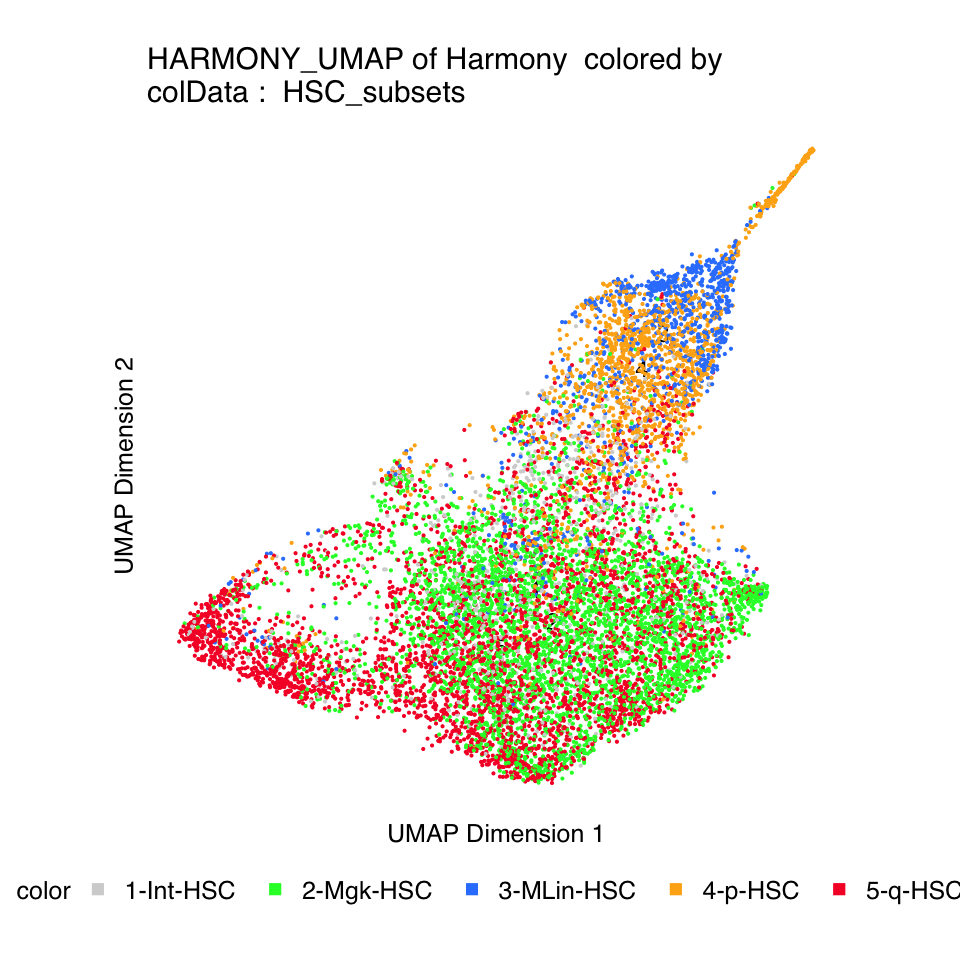

In [30]:
Harmony_HSCannotations <- plotEmbedding(ArchRProj = scatac.object.subset, colorBy = "cellColData", name = "HSC_subsets", embedding = "HARMONY_UMAP",baseSize = 15, labelSize=5,legendSize=3)

p<- Harmony_HSCannotations + theme(panel.border = element_blank(),legend.text = element_text(size=15)) + geom_point(size = 0.5)+ scale_color_manual(values = c('#D3D3D3','#16FF32', '#3283FE', '#FEAF16','#F6222E' ))

#ggsave(paste0(outbase, 'ArchR_HSCannotations.pdf'), p, dpi = 300)
options(repr.plot.width = 8, repr.plot.height = 8)
p

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-109952d73e19c-Date-2025-06-01_Time-11-42-12.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-109952d73e19c-Date-2025-06-01_Time-11-42-12.log



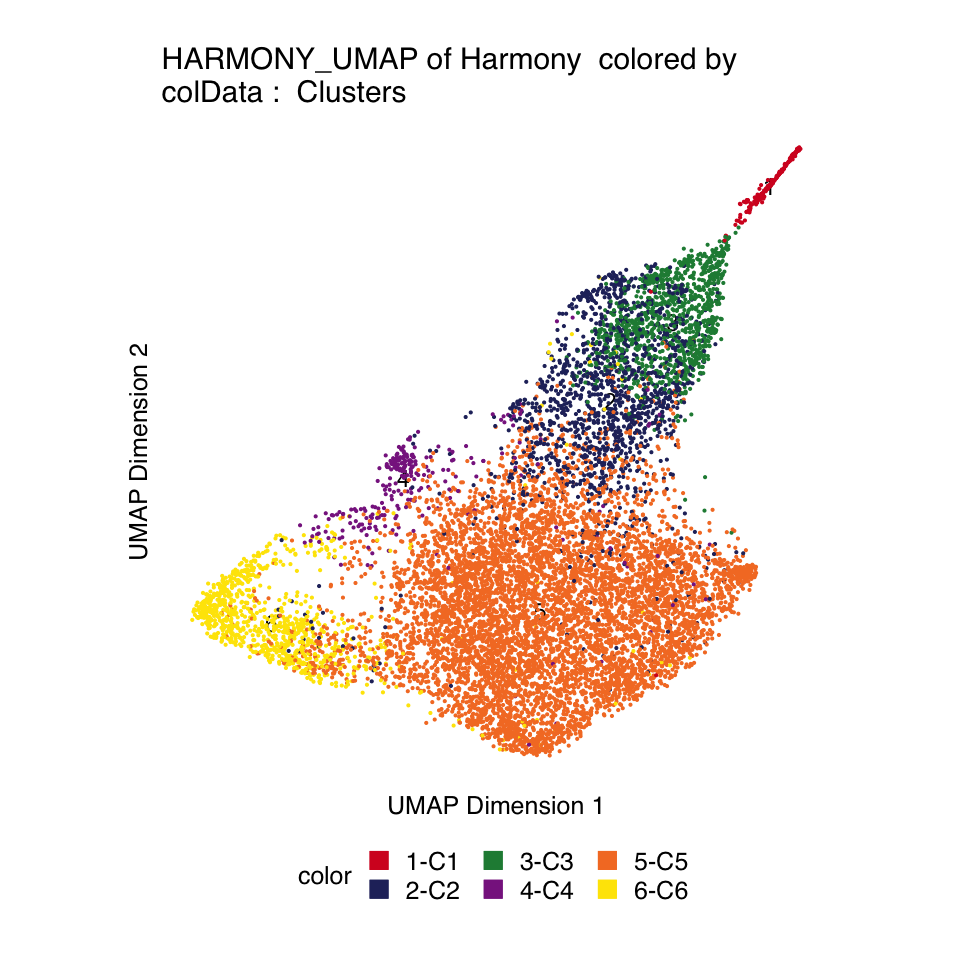

In [31]:
Clusters <- plotEmbedding(
    ArchRProj = scatac.object.subset,
    embedding = "HARMONY_UMAP",
    colorBy = "cellColData",
    name = c("Clusters"), baseSize = 15, labelSize=5,legendSize=5) + geom_point(size = 0.5) + theme(panel.border = element_blank(),legend.text = element_text(size=15))

Clusters
#ggsave(paste0(outbase, 'ArchR_Seurat_Clusters.pdf'), Clusters, dpi = 300)

In [6]:
cM <- confusionMatrix(paste0(scatac.object.subset$Clusters), paste0(scatac.object.subset$lowhigh))
cM

6 x 3 sparse Matrix of class "dgCMatrix"
   High  Mid Low
C5 2102 4034 883
C2  567  558 380
C3  105  320 639
C6  524  389  51
C1  114   79  13
C4   85  125  71

In [7]:
cM1 <- confusionMatrix(paste0(scatac.object.subset$Clusters), paste0(scatac.object.subset$HSC_subsets))
cM1

6 x 5 sparse Matrix of class "dgCMatrix"
   Mgk-HSC q-HSC Int-HSC p-HSC MLin-HSC
C5    3577  2608     514   170      150
C2     106   239     165   707      288
C3       5    12       8   515      524
C6     109   753      60    21       21
C1       5     3       .   190        8
C4     129    72      30    33       17

In [8]:
library(pheatmap)


Attaching package: ‘pheatmap’


The following object is masked from ‘package:ComplexHeatmap’:

    pheatmap




In [9]:
cM <- cM / Matrix::rowSums(cM)
cM1 <- cM1 / Matrix::rowSums(cM1)

In [10]:
colors <- brewer.pal(9, "YlOrRd")

## Figure 3E

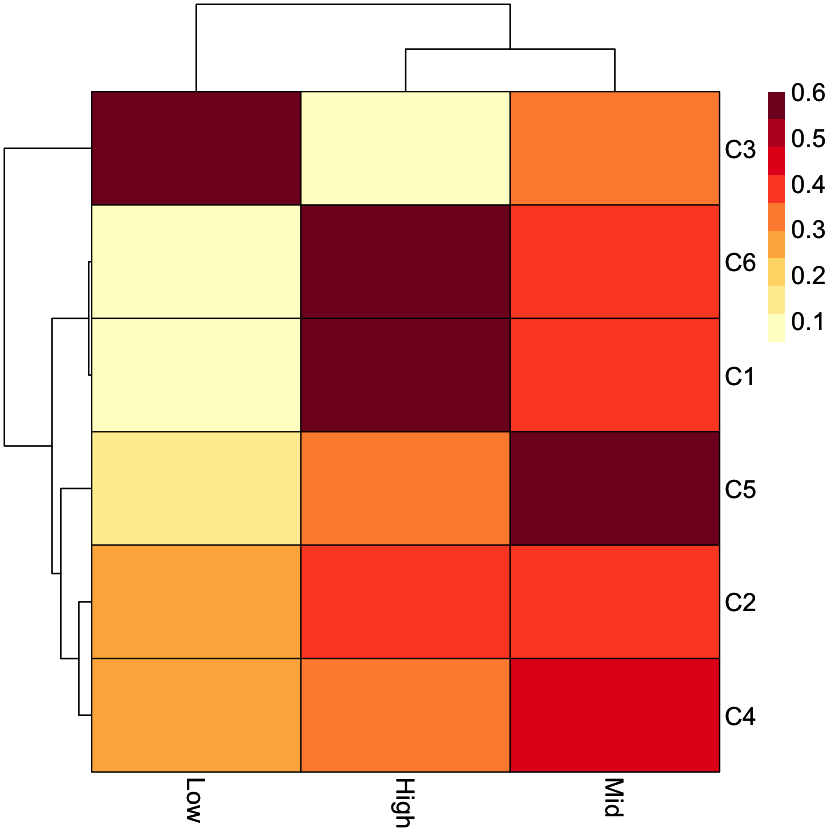

In [11]:
p <- pheatmap::pheatmap(
    mat = as.matrix(cM), 
    color = colors, 
    border_color = "black", 
    fontsize = 15,          # Main font size, also affects the legend
    fontsize_row = 15,      # Row names font size
    fontsize_col = 15 
)
#ggsave(paste0(outbase, 'Cluster_vs_Kit_correlationmatrix.pdf'), p, dpi = 300)
p


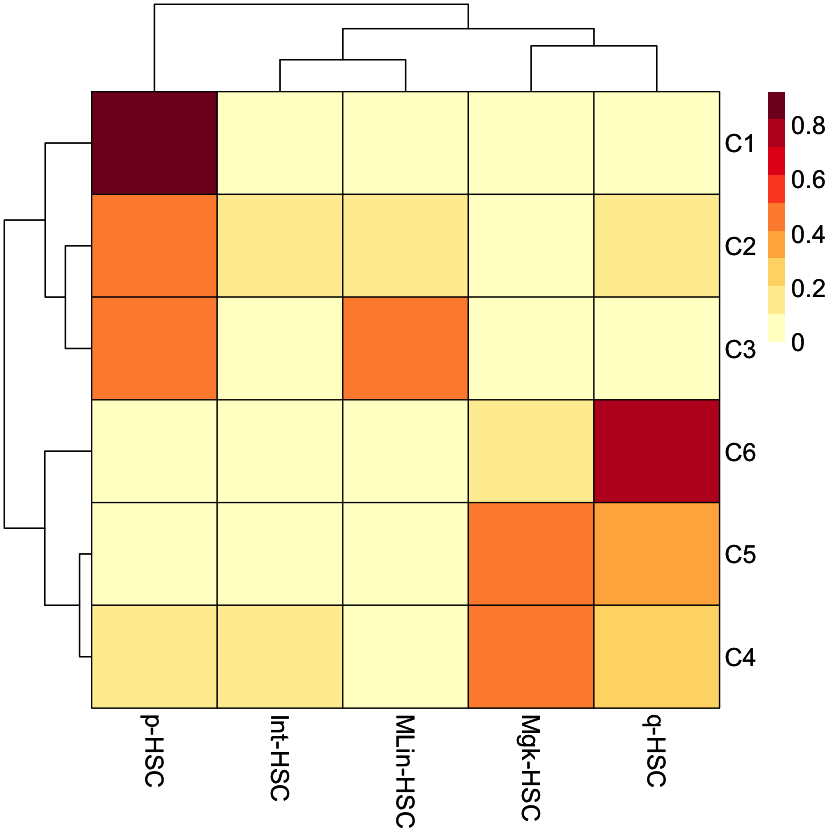

In [12]:
p1 <- pheatmap::pheatmap(
    mat = as.matrix(cM1), 
    color = colors, 
    border_color = "black", 
    fontsize = 15,          # Main font size, also affects the legend
    fontsize_row = 15,      # Row names font size
    fontsize_col = 15 
)
#ggsave(paste0(outbase, 'Cluster_vs_HSCsubset_correlationmatrix.pdf'), p1, dpi = 300)
p1

In [13]:
markerTest <- getMarkerFeatures(
  ArchRProj = scatac.object.subset, 
  useMatrix = "PeakMatrix",
  groupBy = "Clusters",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  useGroups = "C3",
  bgdGroups = "C6"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-1130bf3c6ec4-Date-2025-06-01_Time-11-54-34.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2025-06-01 11:54:35 : Matching Known Biases, 0.01 mins elapsed.

2025-06-01 11:54:36 : Computing Pairwise Tests (1 of 1), 0.031 mins elapsed.

Pairwise Test C3 : Seqnames chr1

Pairwise Test C3 : Seqnames chr10

Pairwise Test C3 : Seqnames chr11

Pairwise Test C3 : Seqnames chr12

Pairwise Test C3 : Seqnames chr13

Pairwise Test C3 : Seqnames chr14

Pairwise Test C3 : Seqnames chr15

Pairwise Test C3 : Seqnames chr16

Pairwise Test C3 : Seqnames chr17

Pairwise Test C3 : Seqnames chr18

Pairwise Test C3 : Seqnames chr19

Pairwise Test C3 : Seqnames chr2

Pairwise Test C3 : Seqnames chr3

Pairwise Test C3 : Seqnames chr4

Pairwise Test C3 : Seqnames chr5

Pairwise Test C3 : Seqnames chr6

Pairwise Test C3 : Seqnames chr7

Pairwise Test C3 : Seqnames chr8

Pairwise Test C3 : Seqnames chr9

Pai

## Figure S7E


Warning message:
“Removed 113 rows containing missing values (`geom_point()`).”


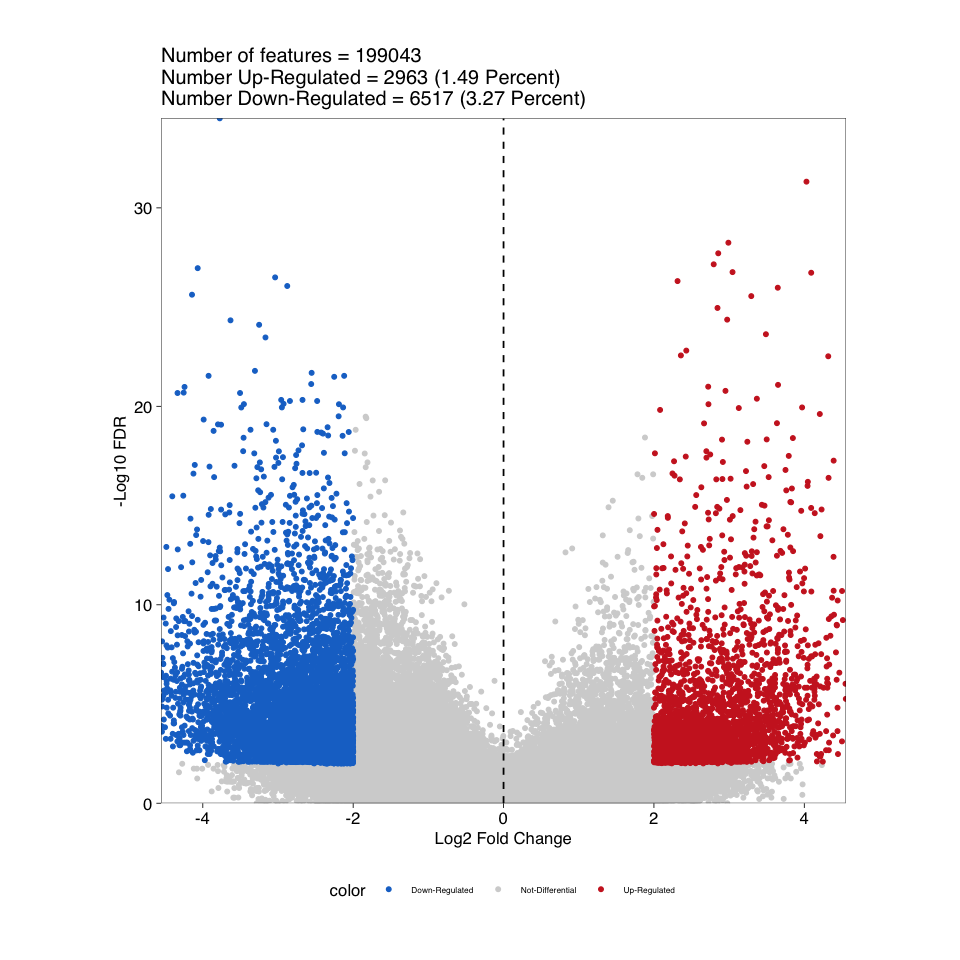

In [15]:
pv <- plotMarkers(seMarker = markerTest, name = "C3", cutOff = "FDR <= 0.01 & abs(Log2FC) >= 2", plotAs = "Volcano", scaleTo = 10^4)
#ggsave(paste0(outbase, 'DAR_C3vsC6_Volcano1.pdf'), pv)
options(repr.plot.width = 8, repr.plot.height = 8)
pv